# Final Project: Brooke Pryor

## Part 1: Deciding what to do

When I met with Noah, I wasn't sure what in the world I should do for a final project. I knew I wanted to do something related to my senior thesis project, but I wasn't sure what that could be, and my coding skills still felt too limited to come up with feasible ideas that weren't too simple. 

We talked about my project and zeroed in on a figure from my recent GSA / G-Hawker poster that could probably be a little better. 

<br>

## My Project: U-Pb Geochronology on Garnets from the Magnet Cove Igneous Complex, Arkansas
<div>
<img src="MCAR.png" width="500"/>
</div>

<br>
<br>
<br>
<br>

<div>
<img src="MCIC_map.jpeg" width="1300"/>
</div>
<br>

[Kimzeyite: a zircon-rich garnet](https://www.mindat.org/min-2209.html)
<br>
[Schorlomite: a titanium-rich garnet](https://www.mindat.org/min-3579.html)
<br>

#### My poster: 
![U-Pb Geochronology of the Magnet Cove Igneous Complex, AR: New Age Constraints from Perovskite, Kimzeyite, and Schorlomite Garnet](Poster.png)

<br>
<br>

#### Figure 4: The figure to be revamped 
<div>
<img src="Fig4.png" width="1000"/>
</div>

<br>
<br>

## Part 2: The Plan

#### Current State
Currently, Figure 4 is a simple box plot from IsoplotR. It shows a mean kimzeyite age with uncertainty as a shaded line across the middle, and shows the spread of ages from different samples (and their uncertainties) as boxes. The kimzeyite boxes are shaded green since that was our new data (the apatite and schorlomites were previously dated during Dalton Pell's senior project). The Schorlomites are seperated into 4 seperate boxes since those ages were obtained from different schorlomite-bearing thin sections from different areas of the igneous complex and three seperate rock types. 

#### What to Change
Noah and I decided that I would recreate this figure using python and make a few improvements. The plan is to create a new CSV file that will someday become a supplementary data file with my senior thesis. In that file would be columns with the sample number, age and uncertainty, mineral name, and locality of all the grains we analyzed. I'd then use the data in that CSV file to calculate a weighted mean for the kimzeyite age and the uncertainty on that weighted mean. I'd use this and the other ages/uncertainties in the supplemetal data to create a box plot. The box plot would display the ages for the different samples as boxes, with their height being dependent on the uncertainty in the weighted mean. It would also show the kimzeyite weighted mean as a line, with the weighted mean uncertainty shown as a colored band around that line, similarly to the current figure. 

#### Coding Techniques
The coding techniques I determined that I would need for this project were pretty straightforward: I'd use pandas to import the data as dataframes, numpy to perform the necessary calculations, and matplotlib.pyplot to create the plot. 

#### Equations
The weighted mean equation is as follows: 
$$
\bar{x} = \frac{\sum w_i x_i}{\sum w_i}
$$

where $\bar{x}$ = weighted average, 
n = number of terms to be averaged, 
$w_{i}$ = weights applied to x values (age uncertanties), and 
$X_{i}$ = data values to be averaged (measured ages).

The most precise weighted mean is calculated using the inverse of the variance (the one-sigma uncertainty, squared) of each data point.  Therefore, the previously mentioned weights ($w_{i}$) will be calculated using the following equation:

$$ w_i = \dfrac{1}{\sigma_i^2} $$

where $\sigma_i$ is the $1\sigma$ uncertainty in each of the $x_i$ measured ages.

# Part 3: The Code

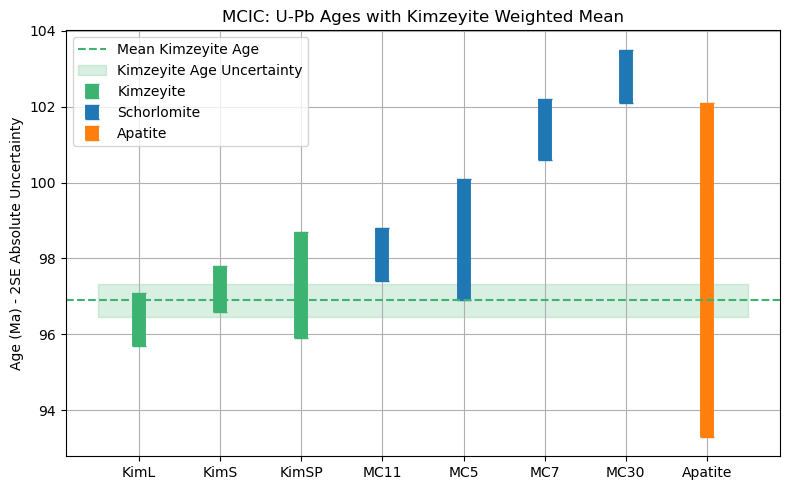

In [188]:
# Import libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data from CSV supplementary data file
data = pd.read_excel( "Magnet Cove U-Pb Supplemental Data.xlsx", header = 1 )

age = data[ "Age (Ma)"]
age_uncertainty = data[ "Uncertainty,  2SE Absolute (Ma)" ]
mineral = data[ "Mineral Name"]
samples = data[ "Sample Name"]

# Change panda series to NumPy arrays
age.to_numpy()
age_uncertainty.to_numpy()


# Pull out rows of data and import ages, uncertainties for each mineral type
kimzeyite_data = data[0:3]
kimzeyite_ages = kimzeyite_data["Age (Ma)"]
kimzeyite_age_uncertainty_1SE = kimzeyite_data[ "Uncertainty,  2SE Absolute (Ma)" ] / 2 # divide by 2 to get 1 SE, since 2SE was used in our analysis
kimzeyite_sample_names = kimzeyite_data["Sample Name"]

schorlomite_data = data[3:7]
schorlomite_ages = schorlomite_data["Age (Ma)"]
schorlomite_age_uncertainty_1SE = schorlomite_data[ "Uncertainty,  2SE Absolute (Ma)" ] / 2 # divide by 2 to get 1 SE, since 2SE was used in our analysis
schorlomite_sample_names = schorlomite_data["Sample Name"]

apatite_data = data[7:8]
apatite_ages = apatite_data["Age (Ma)"]
apatite_age_uncertainty_1SE = apatite_data[ "Uncertainty,  2SE Absolute (Ma)" ] / 2 # divide by 2 to get 1 SE, since 2SE was used in our analysis
apatite_sample_names = apatite_data["Sample Name"]


# Calculate the weighted mean of kimzeyite ages

# Create weighted mean function
def weighted_mean(age, age_uncertainty):
    """
    Calculates the weighted mean for a list of measured ages and their uncertainties.

    Inputs:
      kimzeyite_age: Measured ages from kimzeyite samples. 
      kimzeyite_age_uncertainty: The absolute uncertainty for measured kimzeyite ages (2SE).

    Returns:
      The weighted mean of the measured ages.
      The 1SE uncertainty for the calculated weighted mean.
    """

    weights = ( 1 ) / ( kimzeyite_age_uncertainty_1SE**2 )
    weighted_mean_age = np.sum(weights * age) / np.sum(weights) 
    weighted_mean_uncertainty = np.sqrt( 1 / np.sum(weights) ) #1SE
    return weighted_mean_age, weighted_mean_uncertainty


# Perform weighted mean function
kimzeyite_weighted_mean, kimzeyite_weighted_mean_uncertainty = weighted_mean(kimzeyite_ages, kimzeyite_age_uncertainty_1SE)


# Make a box plot
plt.figure(figsize=(8, 5))

# Plot ages with 2SE error bars
x_kimzeyite = np.arange(len(kimzeyite_ages))
plt.errorbar(x_kimzeyite, kimzeyite_ages, yerr=kimzeyite_age_uncertainty_1SE * 2, fmt=',', elinewidth=10, capsize=5, color='mediumseagreen', label='Kimzeyite')

x_schorlomite = np.array([3, 4, 5, 6])
plt.errorbar(x_schorlomite, schorlomite_ages, yerr=schorlomite_age_uncertainty_1SE * 2, fmt=',', elinewidth=10, capsize=5, label='Schorlomite')

x_apatite = np.array([7])
plt.errorbar(x_apatite, apatite_ages, yerr=apatite_age_uncertainty_1SE * 2, fmt=',', elinewidth=10, capsize=5, label='Apatite')

x_ticks = np.arange(8)

# Plot weighted mean as horizontal line
plt.axhline(kimzeyite_weighted_mean, color='mediumseagreen', linestyle='--', label='Mean Kimzeyite Age')
plt.fill_between(
    [-0.5, len(x_ticks) - 0.5], 
    #[-0.5, len(x_kimzeyite) - 0.5], 
    kimzeyite_weighted_mean - kimzeyite_weighted_mean_uncertainty * 2,
    kimzeyite_weighted_mean + kimzeyite_weighted_mean_uncertainty * 2,
    color='mediumseagreen', alpha=0.2, label='Kimzeyite Age Uncertainty'
)

# plt.xticks(x_kimzeyite, labels=[f"Sample {i+1}" for i in x_kimzeyite])
plt.xticks(x_ticks, labels=samples)
plt.ylabel("Age (Ma) - 2SE Absolute Uncertainty")
plt.title("MCIC: U-Pb Ages with Kimzeyite Weighted Mean")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[Bonus if there's time: Carbonatites are really cool.](https://www.youtube.com/watch?v=qputaVyn7TE&ab_channel=Photovolcanica) 
<br>
[Like, really really cool.](http://www.photovolcanica.com/VolcanoInfo/Oldoinyo%20Lengai/Oldoinyo%20Lengai.html)